# MMC Laboratorium 7

Autor: Jakub Ostrzołek

## Zadanie 1

### Generacja zmiennych losowych $X_1$ i $X_2$

In [174]:
import numpy as np

M = int(1e6)
mu_x1 = mu_x2 = 0
sigma_x1 = 1
sigma_x2 = 2
p = 0.9545
r_star = (1 - p) / 2

x1_samples = np.random.normal(loc=mu_x1, scale=sigma_x1, size=M)
x2_samples = np.random.normal(loc=mu_x2, scale=sigma_x2, size=M)
display(x1_samples[:10])
display(x2_samples[:10])

array([-0.8028064 ,  0.65020339, -1.65308867, -0.46688872, -1.86663852,
       -0.23308275,  0.05849262, -2.339634  ,  0.31888429, -1.79725282])

array([-0.31034052, -4.34708573, -0.05096877,  2.43968607,  0.94969732,
        0.49782388, -0.23596683,  0.02685224, -0.91224639,  0.89864879])

### Obliczanie $\hat{y}$, $\sigma(\hat{y})$ i przedziału rozszerzenia

In [175]:
from IPython.display import Math

ys = x1_samples + x2_samples
y_estimate = np.mean(ys)
y_sigma = np.sqrt(1 / (M - 1) * np.square(ys - y_estimate).sum())
coverage_interval = [np.quantile(ys, r_star), np.quantile(ys, 1 - r_star)]

display(Math(rf"\hat{{y}} = {y_estimate:.4}"))
display(Math(rf"\sigma(\hat{{y}}) = {y_sigma:.4}"))
print("przedział rozszerzenia y = ", coverage_interval)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

przedział rozszerzenia y =  [-4.46275367765407, 4.475339434136734]


### Histogram rozkładu zmiennej losowej $Y$ wraz z estymatą, odchyleniem standardowym i przedziałem rozszerzenia

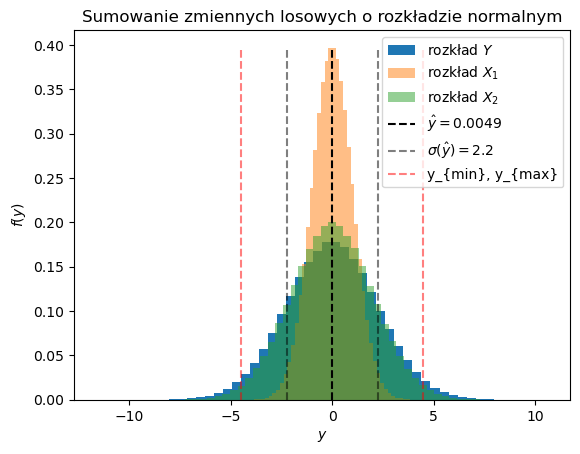

In [176]:
from matplotlib import pyplot as plt

plt.title("Sumowanie zmiennych losowych o rozkładzie normalnym")
hist_y, *_ =plt.hist(ys, bins=50,density=True, label="rozkład $Y$")
hist_x1, *_ = plt.hist(x1_samples, bins=50,density=True, label="rozkład $X_1$", alpha=0.5)
hist_x2, *_ = plt.hist(x2_samples, bins=50,density=True, label="rozkład $X_2$", alpha=0.5)
hists = np.array([hist_y, hist_x1, hist_x2])
plt.vlines(y_estimate, 0, hists.max(), "k", "--", label=rf"$\hat{{y}} = {y_estimate:.2}$")
plt.vlines([y_estimate - y_sigma, y_estimate + y_sigma], 0, hists.max(), "k", "--", label=rf"$\sigma(\hat{{y}}) = {y_sigma:.2}$", alpha=0.5)
plt.vlines(coverage_interval, 0, hists.max(), "r", "--", label=r"y_{min}, y_{max}", alpha=0.5)
plt.ylabel("$f(y)$")
plt.xlabel("$y$")
plt.legend()
plt.show()

### Obliczanie statystyk analitycznie

In [177]:
N = 2
df_dx1 = df_dx2 = 1

mu_y = mu_x1 + mu_x2
sigma_y_gum = np.sqrt(df_dx1**2 * sigma_x1**2 + df_dx1**2 * sigma_x2**2)
coverage_interval_exact = [mu_y - 2 * sigma_y_gum, mu_y + 2 * sigma_y_gum]

display(Math(rf"y = {mu_y}"))
display(Math(rf"\sigma_c(y) = {sigma_y_gum:.4}"))
print("przedział rozszerzenia y = ", coverage_interval_exact)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

przedział rozszerzenia y =  [-4.47213595499958, 4.47213595499958]


### Wnioski

Wartości obliczone analitycznie są bardzo blisko wartości wyznaczonych eksperymentalnie. Wynika to z faktu, że wszystkie założenia dla obliczeń analitycznych zostały spełnione.

## Zadanie 2

### Generacja zmiennych losowych $X_1$ i $X_2$

In [178]:
import numpy as np

M = int(1e6)
x1_min, x1_max = 0, 4
x2_min, x2_max = 5, 6
mu_x1 = np.mean([x1_min, x1_max])
mu_x2 = np.mean([x2_min, x2_max])
sigma_x1 = np.sqrt(np.square(x1_max - x1_min)/12)
sigma_x2 = np.sqrt(np.square(x2_max - x2_min)/12)
p = 0.9545
r_star = (1 - p) / 2

x1_samples = np.random.uniform(low=x1_min, high=x1_max, size=M)
x2_samples = np.random.uniform(low=x2_min, high=x2_max, size=M)

### Obliczanie $\hat{y}$, $\sigma(\hat{y})$ i przedziału rozszerzenia

In [179]:
from IPython.display import Math

ys = x1_samples + x2_samples
y_estimate = ys.sum() / M
y_sigma = np.sqrt(1 / (M - 1) * np.square(ys - y_estimate).sum())
coverage_interval = [np.quantile(ys, r_star), np.quantile(ys, 1 - r_star)]

display(Math(rf"\hat{{y}} = {y_estimate:.4}"))
display(Math(rf"\sigma(\hat{{y}}) = {y_sigma:.4}"))
print("przedział rozszerzenia y = ", coverage_interval)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

przedział rozszerzenia y =  [5.428985822181598, 9.576133056475053]


### Histogram rozkładu zmiennej losowej $Y$ wraz z estymatą i odchyleniem standardowym

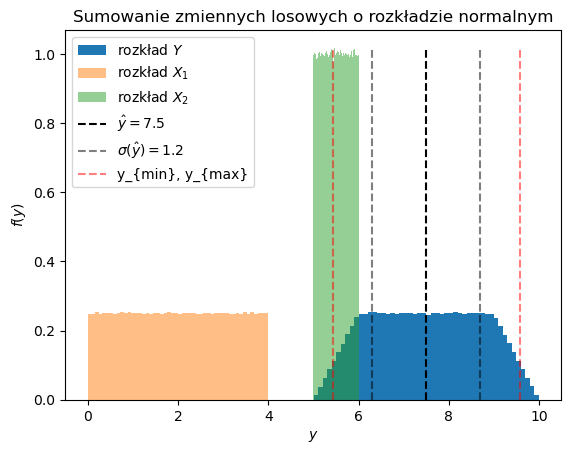

In [180]:
from matplotlib import pyplot as plt

plt.title("Sumowanie zmiennych losowych o rozkładzie normalnym")
hist_y, *_ =plt.hist(ys, bins=50,density=True, label="rozkład $Y$")
hist_x1, *_ = plt.hist(x1_samples, bins=50,density=True, label="rozkład $X_1$", alpha=0.5)
hist_x2, *_ = plt.hist(x2_samples, bins=50,density=True, label="rozkład $X_2$", alpha=0.5)
hists = np.array([hist_y, hist_x1, hist_x2])
plt.vlines(y_estimate, 0, hists.max(), "k", "--", label=rf"$\hat{{y}} = {y_estimate:.2}$")
plt.vlines([y_estimate - y_sigma, y_estimate + y_sigma], 0, hists.max(), "k", "--", label=rf"$\sigma(\hat{{y}}) = {y_sigma:.2}$", alpha=0.5)
plt.vlines(coverage_interval, 0, hists.max(), "r", "--", label=r"y_{min}, y_{max}", alpha=0.5)
plt.ylabel("$f(y)$")
plt.xlabel("$y$")
plt.legend(loc="upper left")
plt.show()

In [181]:
N = 2
df_dx1 = df_dx2 = 1

mu_y = mu_x1 + mu_x2
sigma_y_gum = np.sqrt(df_dx1**2 * sigma_x1**2 + df_dx1**2 * sigma_x2**2)
coverage_interval_exact = [mu_y - 2 * sigma_y_gum, mu_y + 2 * sigma_y_gum]

display(Math(rf"y = {mu_y:.4}"))
display(Math(rf"\sigma_c(y) = {sigma_y_gum:.4}"))
print("przedział rozszerzenia y = ", coverage_interval_exact)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

przedział rozszerzenia y =  [5.119523857152384, 9.880476142847616]


### Wnioski

Tym razem widać większe odstępstwa dla obliczeń analitycznych względem eksperymentów. Średnia i odchylenie standardowe są podobne, jednak przedział rozszerzenia jest węższy o ok. $0.3$ w każdą stronę. Jest to spowodowane, że tym razem wynikowym rozkładem nie będzie rozkład normalny, więc założenie, że $95\%$ przypadków znajdzie się w przedziale $[\mu(y) - 2\sigma_c(y), \mu(y) + 2\sigma_c(y)]$ jest będne.